# Web Scraping of Data Analyst Jobs Analysis 

# 4. Analysis 

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style

df = pd.read_csv('salary_&_date_transformed_08_05_24.csv')

# rearrange orders -put related columns next to each other to make visual  comparisons with the original values 
df_date_salary = df[['title', 'date', 'date_transformed','day_of_week', 'month','salary', 'salary_copy','min_salary', 
                           'max_salary', 'working_hours','employer', 'location', ]]

df_date_salary.head(2)


,title,date,date_transformed,day_of_week,month,salary,salary_copy,min_salary,max_salary,working_hours,employer,location
0,Data Analyst,28 March,2024-03-28,Thursday,March,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000,"Permanent, full-time",SES Water,Redhill
1,Business Data Analyst/Data Analyst,3 days ago,2024-04-24,Wednesday,April,Competitive salary,Competitive salary,1,1,"Contract, full-time",Deutsche Bank,Birmingham


In [4]:
# check the data 
df_date_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             294 non-null    object
 1   date              294 non-null    object
 2   date_transformed  294 non-null    object
 3   day_of_week       294 non-null    object
 4   month             294 non-null    object
 5   salary            294 non-null    object
 6   salary_copy       294 non-null    object
 7   min_salary        294 non-null    int64 
 8   max_salary        294 non-null    int64 
 9   working_hours     294 non-null    object
 10  employer          294 non-null    object
 11  location          294 non-null    object
dtypes: int64(2), object(10)
memory usage: 27.7+ KB


In [5]:
# Checking for duplicates- none
df_date_salary.duplicated().sum()


0

## Display figured salaries

In [2]:
df_date_salary[(df_date_salary[['min_salary', 'max_salary']]>3).any(axis=1)].head(2)


,title,date,date_transformed,day_of_week,month,salary,salary_copy,min_salary,max_salary,working_hours,employer,location
0,Data Analyst,28 March,2024-03-28,Thursday,March,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000,"Permanent, full-time",SES Water,Redhill
3,Data Analyst,9 April,2024-04-09,Tuesday,April,"£32,000 per annum",32000 per annum,32000,0,"Permanent, full-time",Anglian Water,Peterborough


In [3]:
df_date_salary.loc[:, 'max_salary'].head()


0    32000
1        1
2        1
3        0
4        2
Name: max_salary, dtype: int64

In [64]:
df_max=df_date_salary.loc[df_date_salary['max_salary']>3,['title', 'max_salary']]
df_max.head()


,title,max_salary
0,Data Analyst,32000
88,Data Analyst apprentice,17000
90,Data Analyst- Tableau- Power BI- Python- Highe...,78624
91,Data Analyst,126000
92,Data Analyst,35000


In [271]:
df_max.max_salary.min(), df_max.max_salary.max()

(10608, 650000)

In [65]:
df_min=df_date_salary.loc[df_date_salary['min_salary']>3,['title', 'min_salary']]
df_min.head()


,title,min_salary
0,Data Analyst,28000
3,Data Analyst,32000
30,Senior Data Analyst,42000
85,Data Analyst Apprentice,22778
86,Data Analyst Apprentice,18000


In [273]:
df_min[['title','min_salary']].sort_values(by = 'min_salary').head()


,title,min_salary
128,Data Analyst,9360
95,Data Analyst,11232
237,Graduate Connected Car Data Analyst,11232
241,Junior Connected Car Data Analyst,11232
270,Lead Data Analyst Workforce - NHS (b7),14352


In [274]:
df_min.min_salary.min(), df_min.min_salary.max()


(9360, 176400)

In [275]:
df_min.to_csv('min_salary_figure.csv', index=None)
df_max.to_csv('max_salary_figure.csv', index=None)


In [72]:
import pandas as pd

In [73]:
df= pd.read_csv('max_salary_figure.csv')
df.head()

,title,max_salary
0,Data Analyst,32000
1,Data Analyst apprentice,17000
2,Data Analyst- Tableau- Power BI- Python- Highe...,78624
3,Data Analyst,126000
4,Data Analyst,35000


In [79]:
df.tail()

,title,max_salary
151,Data Analyst - Financial Experience - London -...,65000
152,Exciting Opportunity for Graduate Data Analyst...,25000
153,Exciting Opportunity for Graduate Data Analyst...,25000
154,Exciting Opportunity for Graduate Data Analyst...,25000
155,Exciting Opportunity for Graduate Data Analyst...,25000


In [56]:
# 'Competitive salary' is the same number in 'max_salary' & 'min_salary'
df_date_salary.loc[df_date_salary['max_salary']== 3, 'max_salary'].count()

11

In [55]:
df_date_salary.loc[df_date_salary['max_salary']== 0, 'max_salary'].count()

22

In [54]:
df_date_salary.loc[df_date_salary['max_salary']== 1, 'max_salary'].count()

27

In [57]:
df_date_salary.loc[df_date_salary['max_salary']== 2, 'max_salary'].count()

78

In [53]:
df_date_salary.loc[df_date_salary['max_salary']>3, 'max_salary'].count()

156

In [11]:
df_date_salary['max_salary'].dtype

dtype('int64')

In [58]:
df_date_salary['max_salary'].value_counts()[:10]

max_salary
2        78
1        27
0        22
40000    19
45000    16
60000    12
3        11
55000     9
35000     8
25000     7
Name: count, dtype: int64

In [106]:
df_date_salary['max_salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 294 entries, 0 to 293
Series name: max_salary
Non-Null Count  Dtype
--------------  -----
294 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB


### Jobs with No Figure Salaries
**Jobs without fixed salaries make up 39.40% (26.5 + 9.2 +3.7) of the dataset**

In [60]:
# 'Competitive salary', 'Salary negotiable' and  ' Training Course' are the same number in 'max_salary' & 'min_salary' columns 
print(round((df_date_salary.loc[df_date_salary['max_salary']== 1, 'max_salary'].count()/294)*100, 1))
print(round((df_date_salary.loc[df_date_salary['max_salary']== 2, 'max_salary'].count()/294)*100, 1))
print(round((df_date_salary.loc[df_date_salary['max_salary']== 3, 'max_salary'].count()/294)*100, 1))


9.2
26.5
3.7


### Jobs with Figure Salaries
**Jobs with fixed make up 60.6 % (53.1+7.5) of the dataset**

In [49]:
# Jobs with fixed make up 60.6 % (53.1+7.5) of the dataset
print(round((df_date_salary.loc[df_date_salary['max_salary']>3, 'max_salary'].count()/294)*100, 1))
print(round((df_date_salary.loc[df_date_salary['max_salary']==0, 'max_salary'].count()/294)*100, 1)) 


53.1
7.5


## Employers column
- ITonlinelearning Recruitment (78) and Harnham-Data & Analytics Recruitment(23) are top employers

In [15]:
df_date_salary[df_date_salary['employer']=='SES Water']

,title,date,date_transformed,day_of_week,month,salary,salary_copy,min_salary,max_salary,working_hours,employer,location
0,Data Analyst,28 March,2024-03-28,Thursday,March,"£28,000 - £32,000 per annum",28000 - 32000 per annum,28000,32000,"Permanent, full-time",SES Water,Redhill


In [16]:
df_date_salary[df_date_salary['employer']=='Deutsche Bank']

,title,date,date_transformed,day_of_week,month,salary,salary_copy,min_salary,max_salary,working_hours,employer,location
1,Business Data Analyst/Data Analyst,3 days ago,2024-04-24,Wednesday,April,Competitive salary,Competitive salary,1,1,"Contract, full-time",Deutsche Bank,Birmingham


In [14]:
# The top 5 employers offered the most job
df_date_salary.employer.value_counts()[:5]


employer
ITonlinelearning Recruitment              78
Harnham - Data & Analytics Recruitment    23
eFinancialCareers                         13
How to Job Ltd                             9
Charles Moore Associates Ltd               5
Name: count, dtype: int64

In [13]:
df_date_salary.employer.value_counts()[:5].index

Index(['ITonlinelearning Recruitment',
       'Harnham - Data & Analytics Recruitment', 'eFinancialCareers',
       'How to Job Ltd', 'Charles Moore Associates Ltd'],
      dtype='object', name='employer')

**ITonlinelearning Recruitment (78), Harnham - Data & Analytics Recruitment(23), eFinancialCareers(13), How to Job Ltd (9), and Charles Moore Associates Ltd (5) are the top 5 employers in respective order**

## Location column 
- London locations are mixed -like East London, Central London, City of London, North London,Kingston Upon Thames, North West London, Enfield, Twickenham, West London, North London, North West London, Hounslow, Croydon, Barking, Romford, Uxbridge which are all within Greater London                            

In [16]:
location = df_date_salary.location.value_counts()
location[:10]


location
London            84
City of London    12
Manchester        12
Birmingham         6
Watford            5
Ipswich            5
Bristol            5
Leeds              4
West London        4
Peterborough       4
Name: count, dtype: int64

In [17]:
location[:10].values

array([84, 12, 12,  6,  5,  5,  5,  4,  4,  4], dtype=int64)

## Date column
- most jobs are advertised on weekdays'  - least jobs on Weekends 
- Tuesday (68) the highest, Monday (61) second largest job advertised, then it starts to slowdown from Wednesday (60), Thursday (55), Friday (44) then drops sharply on the weekend aturday (3) and Sunday (3) 
- April (167) January ( 63), March (53), December (8), February (2), June (1)
- there is a high peak in April this maybe becasue the start of the financial buget year emplyer trying to get mpre staff with new biudgt 
- January, February, March and April are from 2024 year data
- There's a sharp fall in June. December and June are the only months form year 2023 so I am unable to analysis  
- jobs advertised appear on the website for limited time until someone is hired so this has impacted on 2023 date aas well as on my analysis


### Day_of_the_Week analysis

In [18]:
df_date_salary.columns

Index(['title', 'date', 'date_transformed', 'day_of_week', 'month', 'salary',
       'salary_copy', 'min_salary', 'max_salary', 'working_hours', 'employer',
       'location'],
      dtype='object')

In [2]:
week  = df_date_salary.day_of_week
week

0       Thursday
1      Wednesday
2       Thursday
3        Tuesday
4      Wednesday
         ...    
289      Tuesday
290       Monday
291       Monday
292       Monday
293       Monday
Name: day_of_week, Length: 294, dtype: object

In [3]:
week_day = df_date_salary.day_of_week.value_counts()
week_day


day_of_week
Tuesday      68
Monday       61
Wednesday    60
Thursday     55
Friday       44
Saturday      3
Sunday        3
Name: count, dtype: int64

In [27]:
week_day.index, week_day.values

(Index(['Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
        'Sunday'],
       dtype='object', name='day_of_week'),
 array([68, 61, 60, 55, 44,  3,  3], dtype=int64))

In [4]:
# Reorder the Days of the week in respective to their the number of job advertised 
index = ['Monday','Tuesday',  'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday']
values =   [ 61, 68, 60, 55, 44,  3,  3]


In [5]:
#create a dict and pass the series the data param to the dataframe constructor fro Week_days values count
df_week_day = pd.DataFrame({'week_day':index, 'number of jobs advertised':values})
df_week_day


,week_day,number of jobs advertised
0,Monday,61
1,Tuesday,68
2,Wednesday,60
3,Thursday,55
4,Friday,44
5,Saturday,3
6,Sunday,3


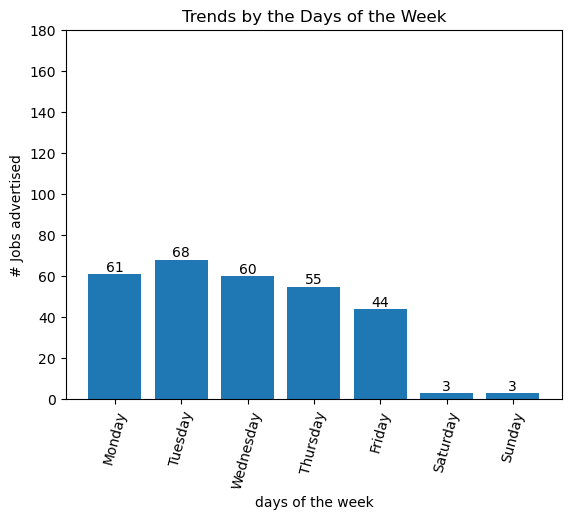

In [8]:
y = df_week_day['number of jobs advertised']
x = df_week_day['week_day']

fig, ax = plt.subplots()

# plt.xticks(rotation='vertical')
plt.xticks(rotation= 75)
ax.set_ylim(0,180)

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha ='center', va='bottom')
    
# Add title and labels
plt.title('Trends by the Days of the Week')
plt.xlabel('days of the week')
plt.ylabel('# Jobs advertised')
    
plt.bar(x,y )
plt.show()


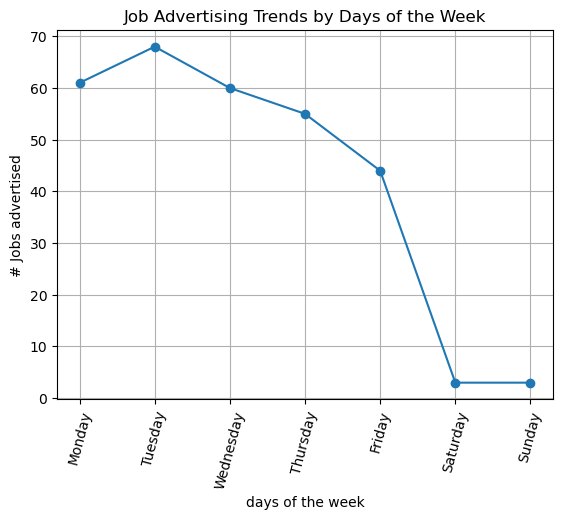

In [9]:
y = df_week_day['number of jobs advertised']
x = df_week_day['week_day']


fig, ax = plt.subplots()

# plt.xticks(rotation='vertical')
plt.xticks(rotation= 75)

plt.plot(x, y, marker='o', linestyle='-')
 
# Add title and labels
plt.title('Job Advertising Trends by Days of the Week')
plt.xlabel('days of the week')
plt.ylabel('# Jobs advertised')
 
# Display grid
plt.grid(True)
 
# Show the plot
plt.show()


### Months analysis 

In [9]:
months = df_date_salary.month.value_counts()
months
                                           

month
April       167
January      63
March        53
December      8
February      2
June          1
Name: count, dtype: int64

In [25]:
 months.index, months.values

(Index(['April', 'January', 'March', 'December', 'February', 'June'], dtype='object', name='month'),
 array([167,  63,  53,   8,   2,   1], dtype=int64))

In [10]:
# Reorder the months in respective to their the number of job advertised 
month_index = [ 'June','December', 'January', 'February', 'March', 'April']
month_values =   [ 1, 8, 63, 2, 53,  167]


**April (167) is the most job advertised and June (1) the least the rest January (63), March (53), December (5) and February (2)** 

In [11]:
df_months = pd.DataFrame({'month':month_index,'number of jobs advertised':month_values})
df_months


,month,number of jobs advertised
0,June,1
1,December,8
2,January,63
3,February,2
4,March,53
5,April,167


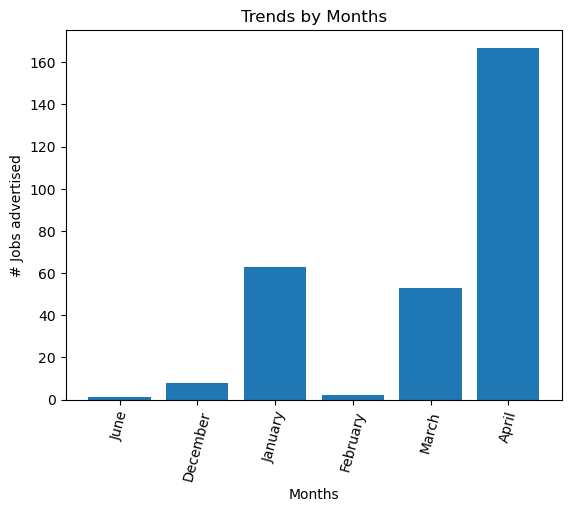

In [12]:
y = df_months['number of jobs advertised']
x = df_months['month']

fig, ax = plt.subplots()

# plt.xticks(rotation='vertical')
plt.xticks(rotation= 75)

# Add title and labels
plt.title('Trends by Months')
plt.xlabel('Months')
plt.ylabel('# Jobs advertised')
 
    
plt.bar(x,y )
plt.show()


In [13]:
# set 'month_index' as index and create a line chart
df_months = df_months.set_index('month')
df_months


,number of jobs advertised
month,
June,1
December,8
January,63
February,2
March,53
April,167


In [10]:
df_months.columns

Index(['month_values'], dtype='object')

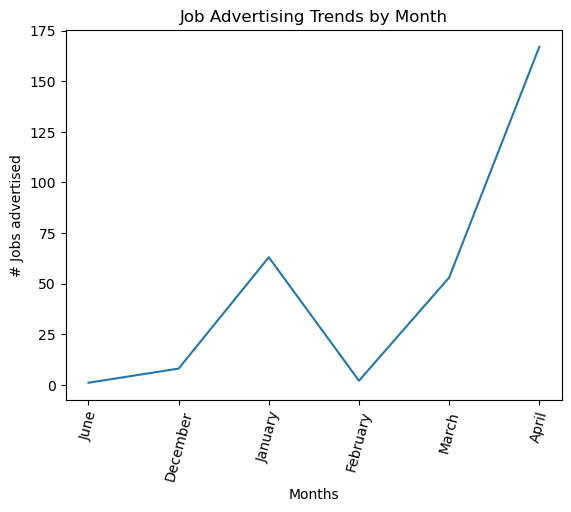

In [14]:
# plt.xticks(rotation='vertical')
plt.xticks(rotation= 75)

# Add title and labels
plt.title('Job Advertising Trends by Month')
plt.xlabel('Months')
plt.ylabel('# Jobs advertised')

plt.plot(df_months, linestyle = '-')
plt.show()


## Salary column
- 26.5% [(78/294)*100] 78 Out of 294 jobs advertised offer 'Competitive salary'  
- 9.2% (27 jobs) [(27/294)*100] employers offer 'Training Course' to fulfill their Data Analyst workforce need. This is an indication that new graduate Data Analysts have promissing future.  
- 3.7 %  [(11/294)*100] 11 employers are willing to negotiate the salary (Salary negotiable') to attract Data Analyst 
- 60.5%  (178)  jobs have fixed slaries

- min_outliers_clean (min_salary) column after from outliers removed conatins 30.1 % (160 rows) less than half from the original 523 rows
- max_outliers_clean (max_salary) column after from outliers removed conatins 31.2 % (163 rows) less than half from the original 523 rows


In [29]:
df_date_salary.max_salary.info()

<class 'pandas.core.series.Series'>
RangeIndex: 294 entries, 0 to 293
Series name: max_salary
Non-Null Count  Dtype
--------------  -----
294 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB


In [27]:
df_date_salary.salary.value_counts().head() 

salary
 Training Course               78
Competitive salary             27
Salary negotiable              11
£35,000 - £40,000 per annum     9
£35,000 - £45,000 per annum     8
Name: count, dtype: int64

 ### Five least paid Jobs (Minimum salary)

In [13]:
df_date_salary.loc[df_date_salary.min_salary >3, ['title','salary', 'min_salary']]

,title,salary,min_salary
0,Data Analyst,"£28,000 - £32,000 per annum",28000
3,Data Analyst,"£32,000 per annum",32000
30,Senior Data Analyst,"£42,000 per annum",42000
85,Data Analyst Apprentice,"£22,778 per annum",22778
86,Data Analyst Apprentice,"£18,000 per annum",18000
...,...,...,...
275,Data Analyst Financial Services Hybrid £600/d ...,£600 per day,151200
276,Exciting Opportunity for Graduate Data Analyst...,"£22,000 - £25,000 per annum",22000
277,Exciting Opportunity for Graduate Data Analyst...,"£22,000 - £25,000 per annum",22000
278,Exciting Opportunity for Graduate Data Analyst...,"£22,000 - £25,000 per annum",22000


In [14]:
# the least paid Data Analyst is £15 - £17 per hour ( £9360 per annum) Temporary, full-time 
df_date_salary.loc[df_date_salary.min_salary >3, ['title','salary','min_salary']].sort_values(by = 'min_salary').head()


,title,salary,min_salary
128,Data Analyst,£15 - £17 per hour,9360
95,Data Analyst,£18.71 per hour,11232
237,Graduate Connected Car Data Analyst,£18.01 per hour,11232
241,Junior Connected Car Data Analyst,£18.01 - £22.67 per hour,11232
270,Lead Data Analyst Workforce - NHS (b7),£23 - £26 per hour,14352


In [15]:
df_date_salary.loc[df_date_salary.min_salary >3, ['title','salary','min_salary']].sort_values(by = 'min_salary').head() ['title']

128                              Data Analyst
95                               Data Analyst
237       Graduate Connected Car Data Analyst
241         Junior Connected Car Data Analyst
270    Lead Data Analyst Workforce - NHS (b7)
Name: title, dtype: object

In [16]:
df_date_salary.loc[df_date_salary.min_salary >3, ['title','salary','min_salary']].sort_values(by = 'min_salary').head() ['title'].values

array(['Data Analyst', 'Data Analyst',
       'Graduate Connected Car Data Analyst',
       'Junior Connected Car Data Analyst',
       'Lead Data Analyst Workforce - NHS (b7)'], dtype=object)

### Five Top paid jobs (Maximum salary)

In [17]:
df_date_salary.max_salary.max()


650000

In [18]:
df_date_salary.max_salary.sort_values(ascending=False)[:5]


191    650000
272    214200
273    163800
173    163800
216    163800
Name: max_salary, dtype: int64

In [19]:
df_date_salary.max_salary.sort_values(ascending=False)[:5].index

Index([191, 272, 273, 173, 216], dtype='int64')

In [20]:
#get the index of'salary','title','max_salary' columns
print(df_date_salary.columns.get_loc('salary'))
print(df_date_salary.columns.get_loc('title'))
print(df_date_salary.columns.get_loc('max_salary'))


5
0
8


In [21]:
# Extract the top 5 highly paid jobs title and salary 
# Business Intelligence (BI) Data Analyst is the heighest paid  £55000 to £650000 per annum Permanent, full-time role
df_date_salary.iloc[[191, 272, 273, 173, 216], [0,5,8]]


,title,salary,max_salary
191,BI Data Analyst,"£55,000 - £650,000 per annum",650000
272,Tech BA/Data Analyst - Booking Model Controls/...,£700 - £850 per day,214200
273,"Senior Business/Data Analyst - Sql, Excel, Dat...",£550 - £650 per day,163800
173,Senior Data Analyst,£550 - £650 per day,163800
216,Data Analyst - Markets Transformation,£600 - £650 per day,163800


In [22]:
df_date_salary.loc[df_date_salary.max_salary >3, ['title','max_salary']].sort_values(by = 'max_salary', ascending=False).head() ['title'].values 

array(['BI Data Analyst',
       'Tech BA/Data Analyst - Booking Model Controls/Tableau',
       'Senior Business/Data Analyst - Sql, Excel, Data Vis, Banking',
       'Data Analyst - Markets Transformation', 'Senior Data Analyst'],
      dtype=object)


### Working hours

-  the majority of the jobs offer Permanent full-time working hours (86.7%) indicating that Data Analyst field would have higher job opportunities and long working hours


In [3]:
working = df_date_salary['working_hours'].value_counts()
working

working_hours
Permanent, full-time                 255
Contract, full-time                   29
Temporary, full-time                   6
Permanent, full-time or part-time      4
Name: count, dtype: int64

In [5]:
working.index, working.values

(Index(['Permanent, full-time', 'Contract, full-time', 'Temporary, full-time',
        'Permanent, full-time or part-time'],
       dtype='object', name='working_hours'),
 array([255,  29,   6,   4], dtype=int64))

In [22]:
working = df_date_salary['working_hours'].value_counts()

df_working = pd.DataFrame({'working_hours':working.index,
                              '# of jobs':working.values})

# Calculating the Percentage share of each working hours
df_working['%'] = round((df_working['# of jobs'] /
                  df_working['# of jobs'].sum()) * 100, 1).astype(str) + '%'
df_working


,working_hours,# of jobs,%
0,"Permanent, full-time",255,86.7%
1,"Contract, full-time",29,9.9%
2,"Temporary, full-time",6,2.0%
3,"Permanent, full-time or part-time",4,1.4%


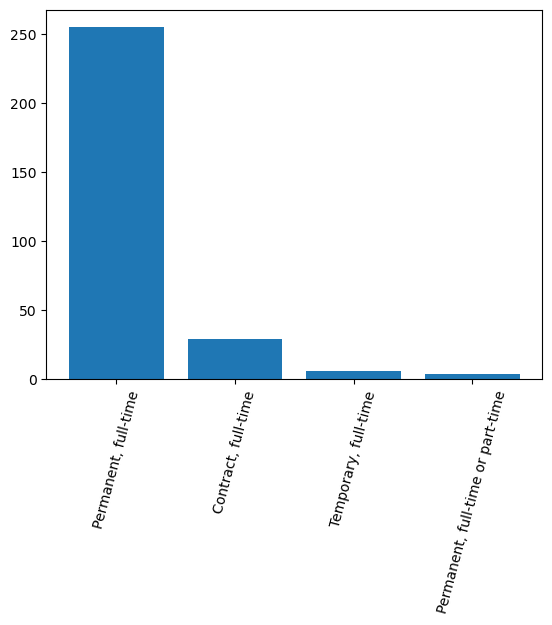

In [11]:
x = df_working_hr['working_hours']
y = df_working_hr['# of jobs']

fig, ax = plt.subplots()

# plt.xticks(rotation='vertical')
plt.xticks(rotation= 75)
# ax.set_ylim(0,180)9

# for i in range(len(x)):
#     plt.text(i, y[i], y[i], ha ='center', va='bottom')
    
plt.bar(x,y )
plt.show()

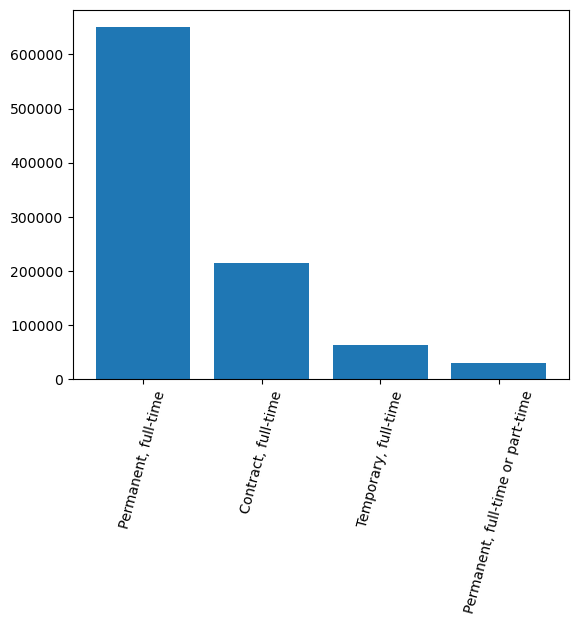

In [25]:
x = df_date_salary.working_hours
y = df_date_salary.max_salary

fig, ax = plt.subplots()

# plt.xticks(rotation='vertical')
plt.xticks(rotation= 75)
    
plt.bar(x,y )
plt.show()


# 5. Visualising the findings 

### Salary Types and Five Top Employers Created Using Tableau Public
https://public.tableau.com/views/webscrapingofjobwebsite/salary_string_2?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link
https://public.tableau.com/views/webscrapingofjobwebsite/Sheet8?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link
<img src="salary_string_2_pie_chart.png" alt ='alt_text' align= "left" width="450"/> 
<img src="top_5_employers.png"  alt ='alt_text' align= "center" width="400"/> 

### Number of Jobs by the day of the week -Created Using Tableau Public 
https://public.tableau.com/views/webscrapingofjobwebsite/Sheet1?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link
https://public.tableau.com/views/webscrapingofjobwebsite/week_day_line?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link
 <img src="week_day_bar.png" alt ='alt_text' align= "left" width="450"/> 
<img src="week_day_line.png"  alt ='alt_text' align= "center" width="450"/> 

### Number of Jobs by Month- Bar and Line Chart Created Using Tableau Public
https://public.tableau.com/views/webscrapingofjobwebsite/months?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link
https://public.tableau.com/views/webscrapingofjobwebsite/month_bar?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link
<img src="month_bar.png" alt ='alt_text' align= "left" width="450"/> 
<img src="months_line.png"  alt ='alt_text' align= "right" width="450"/>

### Five Top and least Paid Data Analyst jobs- Bar Chart Created Using Tableau Public
https://public.tableau.com/views/webscrapingofjobwebsite/top_paid?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link
https://public.tableau.com/views/webscrapingofjobwebsite/least_paid?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link
<img src="top_paid.png" alt ='alt_text' align= "left" width="450"/> 
<img src="least_paid.png"  alt ='alt_text' align= "right" width="450"/>

### Dashboard using Tableau Public
https://public.tableau.com/views/webscrapingofjobwebsite/Dashboard1?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link

https://public.tableau.com/views/webscrapingofjobwebsite/Dashboard1?:language=en-US&:sid=&:display_count=n&:origin=viz_share_link

In [15]:
 %%HTML 
   <div class='tableauPlaceholder' id='viz1716110504585' style='position: relative'><noscript><a href='#'><img alt='Dashboard ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;we&#47;webscrapingofjobwebsite&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='webscrapingofjobwebsite&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;we&#47;webscrapingofjobwebsite&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1716110504585');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1000px';vizElement.style.height='827px';} else { vizElement.style.width='100%';vizElement.style.height='1277px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

# 6. Data Interpretation & storytelling


### Date column findings 
- most jobs are advertised on weekdays - least jobs on Weekends
- Tuesday has the highest job advertising and it is  the best day of the week to use the scraping tool
- Monday (61) is the second largest job advertised, Tuesday (68) the highest then it starts to slow down from Wednesday (60), Thursday (55), Friday (44) then drops sharply on the weekend Saturday (3) and Sunday (3)

- April (167) is the most jobs advertised and June (1) the least the rest January (63), March (53), December (5) and February (2)
- there is a high peak in April this maybe because the start of the financial budget year employers  trying to get more staff with new budget
- January, February, March and April are from the 2024 year data
- There's a sharp fall in June. There is no data between June & December 2023 so I am unable to analysis

- The advertising starts increasing from December 2023 to January 2024, drops sharply in February & starts to increase from March reaching the highest in April (167)
- jobs advertised may appear on the website for a limited time until someone is hired so this has impacted on 2023 date as well as my analysis

### Salary column findings 
 
- 60.5%  (178)  jobs have fixed salaries
- 26.5% [(78/294)*100] 78 Out of 294 jobs advertised offer 'Competitive salary'  
- 9.2% (27 jobs) [(27/294)*100] employers offer 'Training Course' to fullfill their Data Analyst workforce need. 
- 3.7 %  [(11/294)*100] 11 employers are willing to negotiate the salary (Salary negotiable') to attract Data Analyst


- min_outliers_clean (min_salary) column after outliers removed contains 30.1 % (160 rows) less than half of the original 523 rows
- max_outliers_clean (max_salary) ccolumn after outliers removed contains 31.2 % (163 rows) less than half of the original 523 rows

- The Average annual salary of Data Analyst is £39,132 (MEAN of min_salary column + MEAN of max_salary column)/2 



### Employers column findings 

- The ITonlinelearning Recruitment (78) is the top employer followed by Harnham - Data & Analytics Recruitment(23), eFinancialCareers(13), How to Job Ltd (9), and Charles Moore Associates Ltd (5).


### Working hours findings 
- the majority of the jobs offer Permanent full-time(86.7%) indicating that the Data Analyst field would have good job opportunities and long working hours

### Location  
- The location column is mixed and biases my analysis findings I have excluded it. For example, East London, Central London, City of London, North London, Kingston Upon Thames, North West London, Enfield, Twickenham, West London, Hounslow, Croydon, Barking, Romford, Uxbridge are all within Greater London. Similarly, locations around Birmingham are mixed too.  

 


## 7. Summary

- I used the first page of the website to extract titles, salaries, locations, links, and descriptions of each job then experimented with the code before applying it to all pages
- Created a single function that can automatically extract the required information from all pages and save the data as a CSV file
- Processed the data then analysed using data visualization tools - Python libraries, Matplotlib and Seaborn to make comparisons between employers, salaries, working hours and date - change over time.
- From 523 rows of the scrapped data, 229 (44%) duplicates were removed and only 294 rows (56%) were used for my analysis
- Outliers in the min_salary and max_salary columns were significant and removed before the analysis
- Max_salary column after outliers removed contains 55 % (163) of  294 rows, 31% from the original 523 rows
- Min_salary column aafter outliers removed contains 54 % (160) of 294 rows,  30.5% from the original 523 rows
- The dataset I used for min and max salary analysis is just over half of 294 rows


### Conditions to take into account
 
- Jobs with fixed salaries make up 60.6 % and other salaries 39.40%  of the dataset 294 rows
 
- The data sample size of 294 rows is a very small  and contains a few months from 2023
- Jobs appear on the website for a limited period until someone is hired so this has impacted 2023 data as well as my analysis
- This analysis is to demonstrate that I can apply similar methods to large scale data
- Further investigation is required if these jobs advertised are seasonal or  if companies demand is a one off or continues.
- Some jobs are advertised by recruitment agencies on behalf of employers so there may be more jobs on the employers’ website
- On the day of scrapping  (28/04/2024) the website had 2872 Data Analyst Jobs in England but my program extracted 2874 which is an extra of 2 jobs. A further investigation is required as to why this happened.



## 8. References
 
* Getting Started with Data Science by Murtaza Haider (book)
* https://stackoverflow.com/
* [ChatGPT](https://chatgpt.com/auth/login)


## 9. Idea for future project work

* Automatic scrapping of different locations and job titles
